In [1]:
!pip install astsadata statsmodels --upgrade

     |████████████████████████████████| 481kB 31.7MB/s 
     |████████████████████████████████| 9.5MB 37.9MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa as tsm
from astsadata import *

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [3]:
def acf1(x, nlags=None, acf_type="correlation", pacf=False, ax=None, **kwargs):
    lags = np.arange(1, nlags + 1)

    if pacf:
        if acf_type == "correlation":
            values = sm.tsa.pacf(x, nlags=nlags)[1:]
            ylabel = "PACF"
    else:
        if acf_type == "correlation":
            values = sm.tsa.acf(x, nlags=nlags, fft=False)[1:]
            ylabel = "ACF"
        elif acf_type == "covariance":
            values = sm.tsa.acovf(x, nlag=nlags)[1:]
            ylabel = "ACoV"

    if ax is None:
        ax = plt.gca()
 
    ax.bar(lags, values, **kwargs)
    ax.axhline(0, color="black", linewidth=1)
    if acf_type == "correlation":
        conf_level = 1.96 / np.sqrt(x.shape[0])
        ax.axhline(conf_level, color="red", linestyle="--", linewidth=1)
        ax.axhline(-conf_level, color="red", linestyle="--", linewidth=1)
    ax.set_xlabel("LAG")
    ax.set_ylabel(ylabel)

    return ax

# Section 3.7 Building ARIMA Models

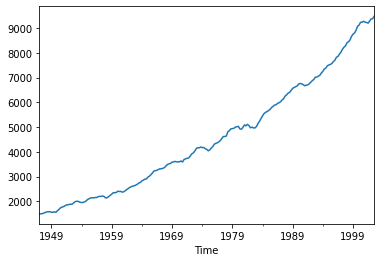

In [4]:
# Example 3.39, 3.40 and 3.43
gnp.plot(xlabel="Time", legend=False)
plt.show()

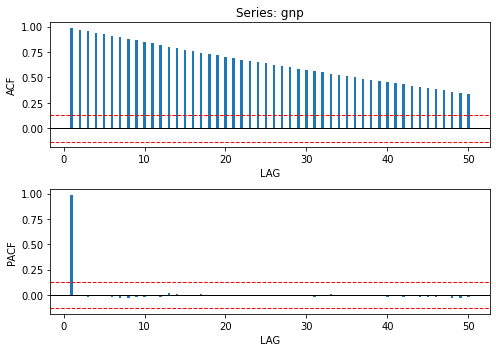

In [5]:
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))

acf1(gnp, nlags=50, ax=axes[0], width=.3)
axes[0].set_title("Series: gnp")

acf1(gnp, nlags=50, pacf=True, ax=axes[1], width=.3)

fig.tight_layout()
plt.show()

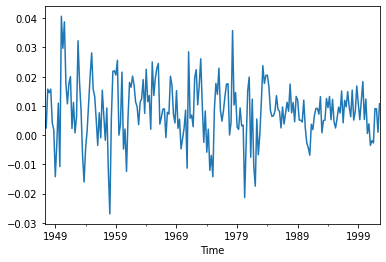

In [6]:
gnpgr = gnp.apply(np.log).diff().dropna()

gnpgr.plot(xlabel="Time", legend=False)
plt.show()

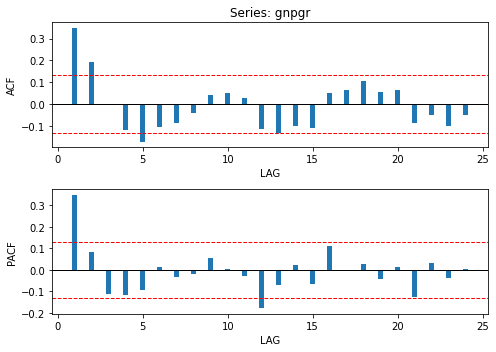

In [7]:
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))

acf1(gnpgr, nlags=24, ax=axes[0], width=.3)
axes[0].set_title("Series: gnpgr")

acf1(gnpgr, nlags=24, pacf=True, ax=axes[1], width=.3)
 
fig.tight_layout()
plt.show()

In [8]:
ar_1 = sm.tsa.SARIMAX(gnpgr, order=(1, 0, 0), trend="c").fit()
print(ar_1.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  222
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 718.610
Date:                Fri, 14 May 2021   AIC                          -1431.220
Time:                        06:25:08   BIC                          -1421.012
Sample:                    06-30-1947   HQIC                         -1427.099
                         - 09-30-2002                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0054      0.001      7.626      0.000       0.004       0.007
ar.L1          0.3481      0.055      6.289      0.000       0.240       0.457
sigma2      9.021e-05   6.47e-06     13.946      0.0

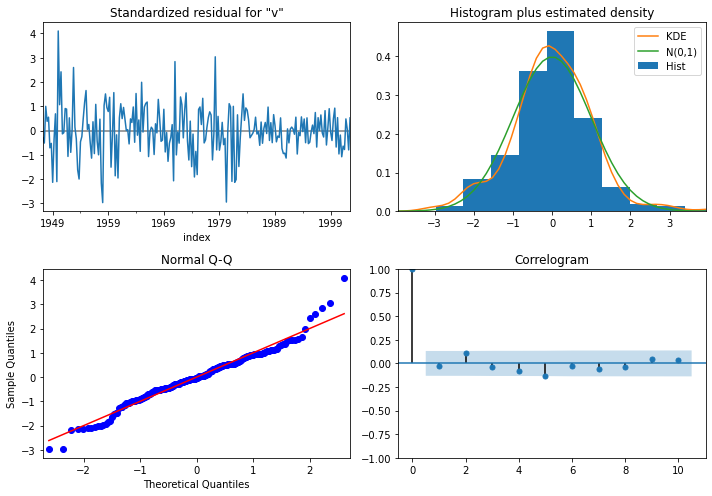

In [9]:
fig = ar_1.plot_diagnostics(figsize=(10, 7))
fig.tight_layout()
plt.show()

In [10]:
ma_2 = sm.tsa.SARIMAX(gnpgr, order=(0, 0, 2), trend="c").fit()
print(ma_2.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  222
Model:               SARIMAX(0, 0, 2)   Log Likelihood                 719.965
Date:                Fri, 14 May 2021   AIC                          -1431.929
Time:                        06:25:09   BIC                          -1418.319
Sample:                    06-30-1947   HQIC                         -1426.434
                         - 09-30-2002                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0083      0.001      8.531      0.000       0.006       0.010
ma.L1          0.3028      0.055      5.542      0.000       0.196       0.410
ma.L2          0.2036      0.056      3.650      0.0

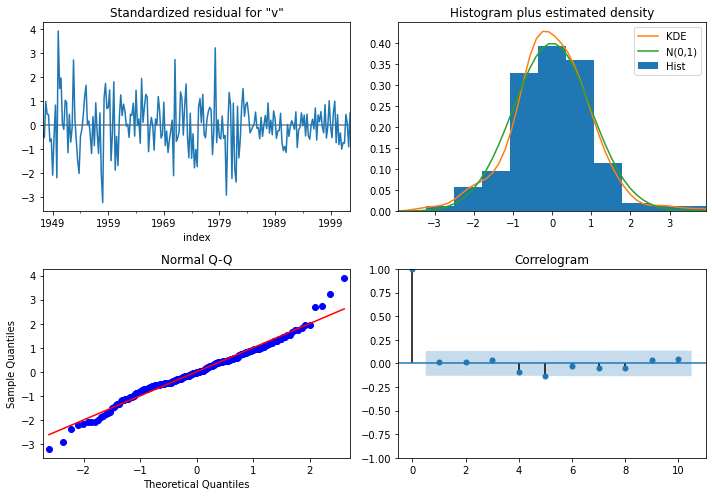

In [11]:
fig = ma_2.plot_diagnostics(figsize=(10, 7))
fig.tight_layout()
plt.show()

In [12]:
tsm.arima_process.arma2ma(ar=[1, -.35], ma=[1, 0], lags=11)

array([1.00000000e+00, 3.50000000e-01, 1.22500000e-01, 4.28750000e-02,
       1.50062500e-02, 5.25218750e-03, 1.83826562e-03, 6.43392969e-04,
       2.25187539e-04, 7.88156387e-05, 2.75854735e-05])

In [13]:
# Example 3.41
model_1 = sm.tsa.SARIMAX(varve.apply(np.log), order=(0, 1, 1)).fit() # ARIMA(0, 1, 1)
print(model_1.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  634
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -440.718
Date:                Fri, 14 May 2021   AIC                            885.435
Time:                        06:25:10   BIC                            894.336
Sample:                      12-31-01   HQIC                           888.892
                          - 12-31-634                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7705      0.023    -32.948      0.000      -0.816      -0.725
sigma2         0.2353      0.012     19.124      0.000       0.211       0.259
Ljung-Box (L1) (Q):                   9.10   Jarque-

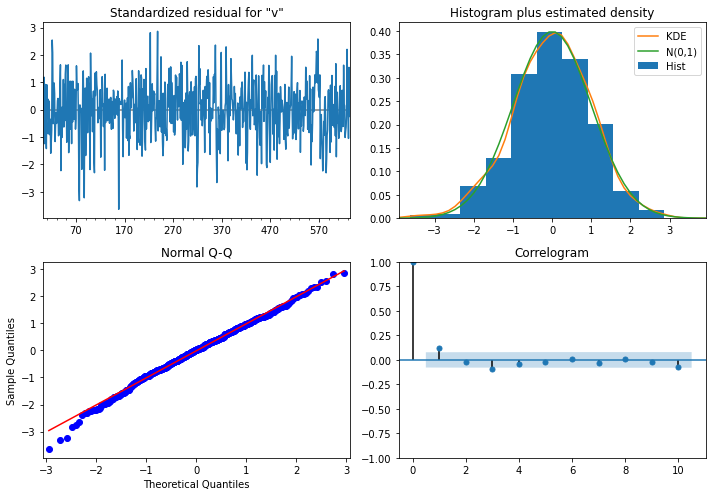

In [14]:
fig = model_1.plot_diagnostics(figsize=(10, 7))
fig.tight_layout()
plt.show()

In [15]:
model_2 = sm.tsa.SARIMAX(varve.apply(np.log), order=(1, 1, 1)).fit() # ARIMA(1, 1, 1)
print(model_2.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  634
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -431.438
Date:                Fri, 14 May 2021   AIC                            868.875
Time:                        06:25:11   BIC                            882.226
Sample:                      12-31-01   HQIC                           874.060
                          - 12-31-634                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2330      0.044      5.310      0.000       0.147       0.319
ma.L1         -0.8858      0.020    -43.608      0.000      -0.926      -0.846
sigma2         0.2284      0.012     18.727      0.0

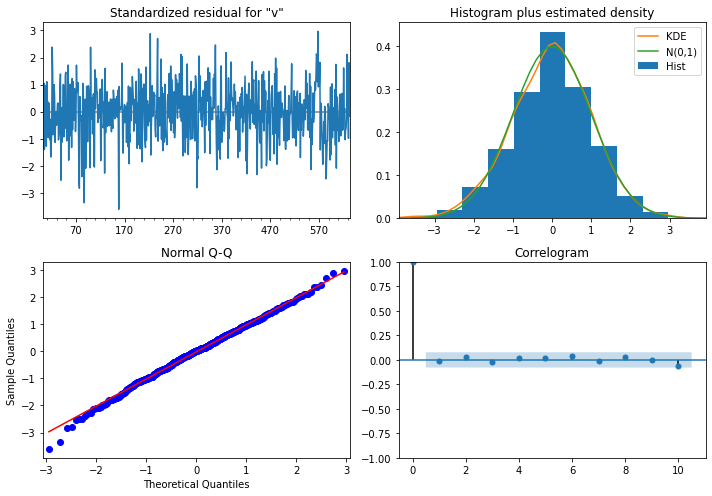

In [16]:
fig = model_2.plot_diagnostics(figsize=(10, 7))
fig.tight_layout()
plt.show()